# Jeu de données Iris


Nous allons utiliser le jeu de données Iris 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# Chargement des données
iris = datasets.load_iris()

In [ ]:
iris

Pour pouvoir afficher les résultats, on va utiliser seulement les 
premiers deux attributs (longueur et largeur des sépales).

In [ ]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [ ]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

**Question
Calculez le score d’échantillons bien classifiés sur le jeu de données de test**

In [ ]:
lin_svc.score(X_test,y_test)

0.6133333333333333

Visualisons maintenant la surface de décision apprise par notre modèle

Text(0.5, 1.0, 'LinearSVC')

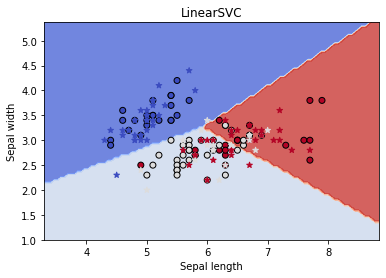

In [ ]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 1.0, 'LinearSVC')

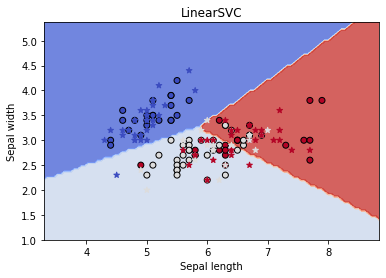

In [ ]:
C = 5.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 1.0, 'LinearSVC')

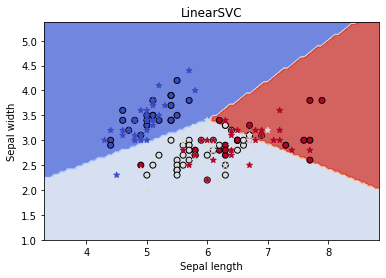

In [ ]:
C = 10.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, 
cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

Le paramètre de régularisation  C indique à l'optimisation SVM dans quelle mesure on souhaite éviter de mal classer chaque exemple d'entraînement.Pour les grandes valeurs de C, la performance du modele evolue dans le cas de classification versicolor et se dégrade dans la pédiction de la classe  virginica

**Question
D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au 
problème ? Si non, que peut-on faire pour l’améliorer ?**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


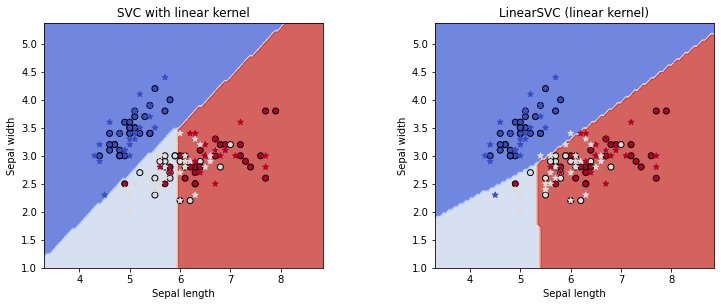

In [ ]:
C=1.0
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
 plt.subplot(1, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # Utiliser une palette de couleurs
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 # Afficher aussi les points d'apprentissage
 plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', 
c=y_train, cmap=plt.cm.coolwarm)
 plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', 
c=y_test, cmap=plt.cm.coolwarm)
 plt.xlabel('Sepal length')
 plt.ylabel('Sepal width')
 plt.title(titles[i])
plt.show()

Le modèle n'est pas adapté au  problème car il n'arrive pas à bien séparer les classes versicolor et  virginica

**Question
Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire 
mais en utilisant les quatre attributs du jeu de données Iris. Le score de 
classification en test a-t-il augmenté ? Pourquoi ?**

In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9733333333333334

Aprés avoir utilisé les quatre attribut ,on constate que le score de classification a augmenté. Cela vient du fait que SVM sont efficaces dans le cas où la dimension de l’espace est plus grande

# Jeu de données Digits

**Question :
Utilisez les données Digits pour construire un classifieur LinearSVC et 
évaluez-le**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)
lin_svc = svm.SVC(kernel='rbf', random_state = 1)
lin_svc.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
lin_svc.score(X_test,y_test)

0.9666666666666667